In [21]:
#importing dependencies
import pandas as Pd 
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
#reading historical file
csv_path_historic="Resources/fdp-beta-state-historical (1).csv"
csv_file_historic=Pd.read_csv(csv_path_historic,encoding='cp1252')

In [3]:
csv_file_historic


,Variable,Year,Value,RSE,State,Industry
0,AI stud fees and herd testing ($),1990,200.0,118.0,New South Wales,All Broadacre
1,Accounting services ($),1990,2620.0,7.0,New South Wales,All Broadacre
2,Advisory services ($),1990,180.0,105.0,New South Wales,All Broadacre
3,Age of owner manager (yrs),1990,55.0,2.0,New South Wales,All Broadacre
4,Age of spouse (yrs),1990,52.0,2.0,New South Wales,All Broadacre
...,...,...,...,...,...,...
184255,Wheat receipts ($),2022,0.0,NaN,Western Australia,Sheep-Beef
184256,Wheat sold (t),2022,0.0,NaN,Western Australia,Sheep-Beef
184257,Wool cut per head (kg),2022,3.6,5.0,Western Australia,Sheep-Beef
184258,Wool produced (kg),2022,9302.0,16.0,Western Australia,Sheep-Beef


In [6]:
wheat_sold=csv_file_historic.loc[(csv_file_historic['Variable']=='Wheat sold (t)'),:]
wheat_produced=csv_file_historic.loc[(csv_file_historic['Variable']=='Wheat produced (t)'),:]
wheat_sold_df=wheat_sold[['Variable','Year','Value','State']]
wheat_sold_df=wheat_sold_df.rename(columns={'Value':'sold(t)'})
wheat_sold_df=wheat_sold_df.reset_index().drop(['index','Variable'],axis=1)
wheat_sold_df


,Year,sold(t),State
0,1990,126.0,New South Wales
1,1990,4.0,New South Wales
2,1990,690.0,New South Wales
3,1990,291.0,New South Wales
4,1990,26.0,New South Wales
...,...,...,...
1213,2022,1.0,Western Australia
1214,2022,6789.0,Western Australia
1215,2022,1238.0,Western Australia
1216,2022,99.0,Western Australia


In [7]:
#wheat production from 1990 to 2022
wheat_produced=csv_file_historic.loc[(csv_file_historic['Variable']=='Wheat produced (t)'),:]
wheat_produced_df=wheat_produced[['Variable','Year','Value']]
wheat_produced_df=wheat_produced_df.rename(columns={'Value':'produced(t)'})
#wheat_produced_df['Kt']=wheat_sold_df['Kt']/2
wheat_produced_df=wheat_produced_df.reset_index().drop(['index','Variable'],axis=1)
wheat_produced_df

,Year,produced(t)
0,1990,124.0
1,1990,4.0
2,1990,651.0
3,1990,296.0
4,1990,22.0
...,...,...
1213,2022,2.0
1214,2022,7230.0
1215,2022,1353.0
1216,2022,99.0


In [8]:
#Merging above two dataframes
data_df=Pd.merge(wheat_sold_df,wheat_produced_df)
data_df['Used(t)']=data_df['produced(t)']-data_df['sold(t)']

data_df.rename(columns={'sold(t)':'Exported(t)'})
data_df=data_df[data_df['Used(t)']>0]
data_df

,Year,sold(t),State,produced(t),Used(t)
2,1990,126.0,New South Wales,651.0,525.0
3,1990,126.0,New South Wales,296.0,170.0
10,1990,126.0,New South Wales,325.0,199.0
11,1990,126.0,New South Wales,255.0,129.0
14,1990,126.0,New South Wales,264.0,138.0
...,...,...,...,...,...
44964,2022,0.0,Western Australia,2141.0,2141.0
44965,2022,0.0,Western Australia,2.0,2.0
44966,2022,0.0,Western Australia,7230.0,7230.0
44967,2022,0.0,Western Australia,1353.0,1353.0


In [13]:
#wheat export is taken as 50% of wheat sold
wheat_by_state=data_df.groupby(['State','Year']).sum()
wheat_by_state=wheat_by_state.reset_index()
wheat_by_state=wheat_by_state.rename(columns={'sold(t)':'Exported(t)'})
wheat_by_state=wheat_by_state.set_index("Year")
wheat_by_state['Exported(t)']=wheat_by_state['Exported(t)']/2
wheat_by_state

,State,Exported(t),produced(t),Used(t)
Year,,,,
1990,New South Wales,3703.5,32136.0,24729.0
1991,New South Wales,3938.0,33712.0,25836.0
1992,New South Wales,2485.0,25589.0,20619.0
1993,New South Wales,3564.0,36385.0,29257.0
1994,New South Wales,3730.5,35209.0,27748.0
...,...,...,...,...
2018,Western Australia,5500.5,57804.0,46803.0
2019,Western Australia,5968.0,56129.0,44193.0
2020,Western Australia,4574.5,48181.0,39032.0


In [58]:
state_data_victoria=wheat_by_state[wheat_by_state['State']=='Victoria']
state_data_2020=wheat_by_state[wheat_by_state['Year']==2020]


Following line charts shows trends in wheat usage by every state

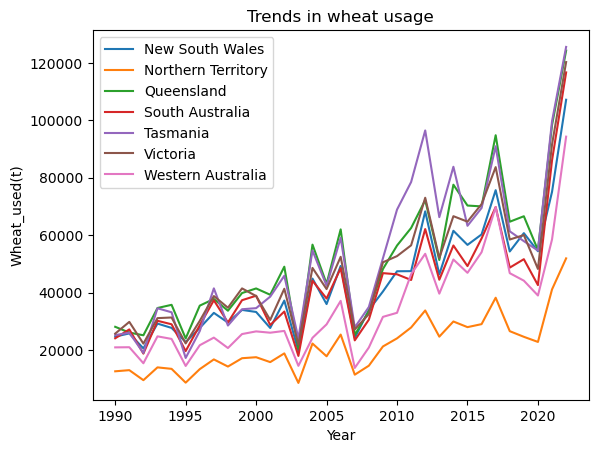

In [16]:
wheat_by_state.groupby("State")['Used(t)'].plot(legend=True, xlabel="Year", ylabel="Wheat_used(t)")
plt.title('Trends in wheat usage')
plt.show()

Following line charts show trends in wheat export by every state

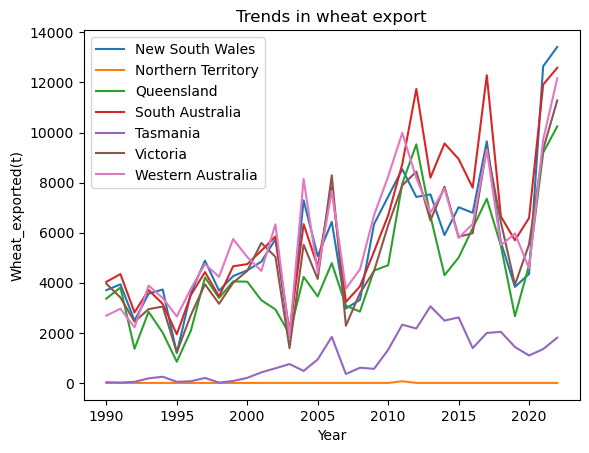

In [19]:

wheat_by_state.groupby("State")['Exported(t)'].plot(legend=True, xlabel="Year", ylabel="Wheat_exported(t)")
plt.title('Trends in wheat export')
plt.show()

Regression analysis between wheat production and wheat export

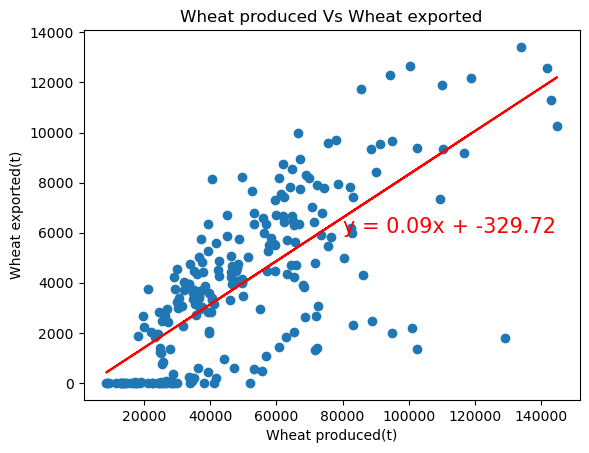

In [44]:
#Linear regression for wheat produced and wheat exported
plt.scatter(wheat_by_state['produced(t)'],wheat_by_state['Exported(t)'])
plt.xlabel('Wheat produced(t)')
plt.ylabel('Wheat exported(t)')
plt.title('Wheat produced Vs Wheat exported')
(slope, intercept, rvalue, pvalue, stderr) = linregress(wheat_by_state['produced(t)'],wheat_by_state['Exported(t)'])
regress_values = wheat_by_state['produced(t)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(wheat_by_state['produced(t)'],regress_values,"r-")
plt.annotate(line_eq,(80000,6000),fontsize=15,color="red")
plt.show()